import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data
df = pd.read_csv('lungs disease.csv')
df.head(10)

,Patient_ID,Age,Gender,Smoking_Status,Years_of_Smoking,Occupation,Disease_Type,Oxygen_Level,Chest_Pain,Shortness_of_Breath,Coughing,Diagnosis
0,1,32,Female,Yes,26,Farmer,COPD,81,Yes,No,No,Negative
1,2,21,Female,Yes,2,Student,Pneumonia,78,No,No,No,Positive
2,3,53,Female,Yes,40,Student,COPD,76,Yes,Yes,Yes,Negative
3,4,49,Female,Yes,37,Office Job,Asthma,96,No,Yes,Yes,Negative
4,5,46,Male,No,7,Factory Worker,Pneumonia,91,No,Yes,No,Positive
5,6,35,Male,No,28,Student,Bronchitis,93,No,No,Yes,Positive
6,7,31,Female,No,29,Office Job,Pneumonia,76,Yes,Yes,No,Negative
7,8,29,Female,Yes,37,Driver,Bronchitis,90,Yes,Yes,No,Negative
8,9,72,Male,No,32,Farmer,Asthma,78,Yes,Yes,No,Negative
9,10,22,Female,Yes,8,Farmer,COPD,83,Yes,Yes,No,Negative


clean the data

In [3]:
# check null values
df.isnull().sum()  # there is a no null values

,0
Patient_ID,0
Age,0
Gender,0
Smoking_Status,0
Years_of_Smoking,0
Occupation,0
Disease_Type,0
Oxygen_Level,0
Chest_Pain,0
Shortness_of_Breath,0


In [4]:
# check duplicated values
df.duplicated().sum() # there is a no duplicated values

np.int64(0)

In [5]:
df.info() # show summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           1200 non-null   int64 
 1   Age                  1200 non-null   int64 
 2   Gender               1200 non-null   object
 3   Smoking_Status       1200 non-null   object
 4   Years_of_Smoking     1200 non-null   int64 
 5   Occupation           1200 non-null   object
 6   Disease_Type         1200 non-null   object
 7   Oxygen_Level         1200 non-null   int64 
 8   Chest_Pain           1200 non-null   object
 9   Shortness_of_Breath  1200 non-null   object
 10  Coughing             1200 non-null   object
 11  Diagnosis            1200 non-null   object
dtypes: int64(4), object(8)
memory usage: 112.6+ KB


In [6]:
#check statistics
df.describe()

,Patient_ID,Age,Years_of_Smoking,Oxygen_Level
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,51.350000,20.588333,87.151667
std,346.554469,19.229508,11.863437,7.162384
min,1.000000,18.000000,0.000000,75.000000
25%,300.750000,34.000000,11.000000,81.000000
50%,600.500000,51.000000,21.000000,87.000000
75%,900.250000,69.000000,31.000000,93.000000
max,1200.000000,85.000000,40.000000,99.000000


In [7]:
df.columns # show all columns name

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_Status', 'Years_of_Smoking',
       'Occupation', 'Disease_Type', 'Oxygen_Level', 'Chest_Pain',
       'Shortness_of_Breath', 'Coughing', 'Diagnosis'],
      dtype='object')

In [8]:
df.Occupation.unique(), df.Disease_Type.unique() # check unique values of the occupation and disease_type

(array(['Farmer', 'Student', 'Office Job', 'Factory Worker', 'Driver',
        'Housewife'], dtype=object),
 array(['COPD', 'Pneumonia', 'Asthma', 'Bronchitis', 'Normal',
        'Lung Cancer'], dtype=object))

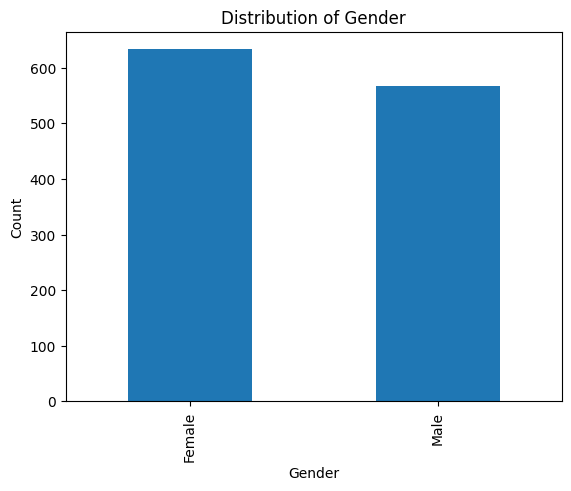

In [9]:
# check maximum number of males and females using bar chart
df.Gender.value_counts().plot(kind='bar') # maximum females under the lungs problems
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

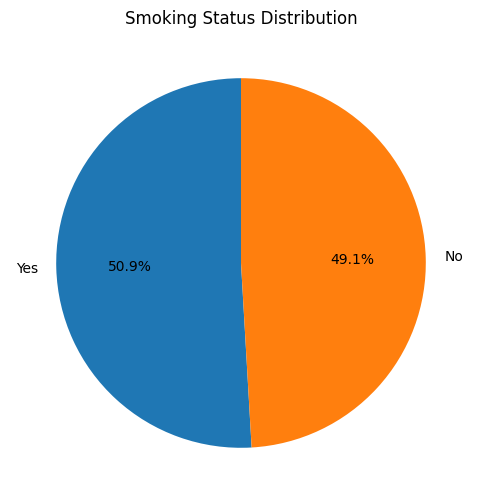

In [10]:
# check people more smoking or not using pie graph
smoking_status_counts = df.Smoking_Status.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Smoking Status Distribution')
plt.show()

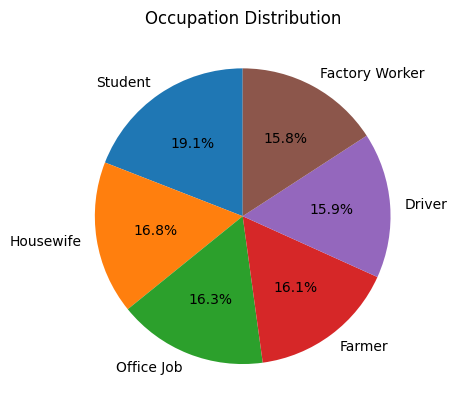

In [11]:
# check the occupation with the help of the piechart

plt.pie(df.Occupation.value_counts(), labels=df.Occupation.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Occupation Distribution')
plt.show()

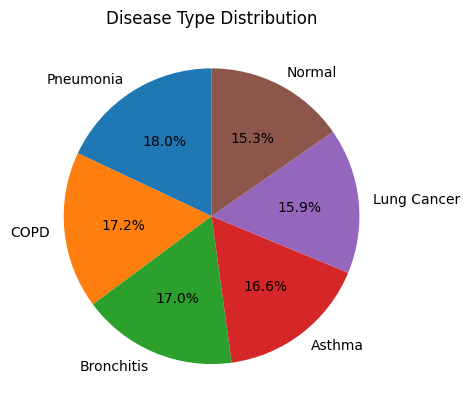

In [12]:
# check disease type with the help of pie chart #

plt.pie(df.Disease_Type.value_counts(), labels=df.Disease_Type.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Disease Type Distribution')
plt.show()

In [13]:
# upon pie chart does not understand the disease_type
# then count the all disease_type separately
problem_types = ['Asthma', 'COPD', 'Lung Cancer', 'Bronchitis', 'Normal', 'Pneumonia'] # Note: 'Lung_Cancer' from original code is 'Lung Cancer' in the data
problem_count = df[df['Disease_Type'].isin(problem_types)]['Disease_Type'].value_counts()
print(problem_count)

Disease_Type
Pneumonia      216
COPD           206
Bronchitis     204
Asthma         199
Lung Cancer    191
Normal         184
Name: count, dtype: int64


In [14]:
# check diagnosis problem is more or not
df.Diagnosis.value_counts() # also more people suffer diagnosis

,count
Diagnosis,
Negative,642
Positive,558


In [29]:
#show the groupby(gender wise and disease_type) with diagnosis
df.groupby(['Gender', 'Disease_Type'])['Diagnosis'].value_counts()

Gender  Disease_Type  Diagnosis
Female  Asthma        Negative     66
                      Positive     51
        Bronchitis    Positive     58
                      Negative     49
        COPD          Negative     57
                      Positive     46
        Lung Cancer   Negative     68
                      Positive     36
        Normal        Negative     46
                      Positive     42
        Pneumonia     Positive     59
                      Negative     55
Male    Asthma        Negative     41
                      Positive     41
        Bronchitis    Negative     50
                      Positive     47
        COPD          Negative     57
                      Positive     46
        Lung Cancer   Negative     44
                      Positive     43
        Normal        Negative     54
                      Positive     42
        Pneumonia     Negative     55
                      Positive     47
Name: count, dtype: int64

In [24]:
# groupby occupation ana diagnosis
df.groupby('Occupation')['Diagnosis'].value_counts()

Occupation      Diagnosis
Driver          Negative      97
                Positive      94
Factory Worker  Negative      97
                Positive      93
Farmer          Negative     107
                Positive      86
Housewife       Negative     105
                Positive      96
Office Job      Negative     115
                Positive      81
Student         Negative     121
                Positive     108
Name: count, dtype: int64

<Axes: xlabel='Occupation'>

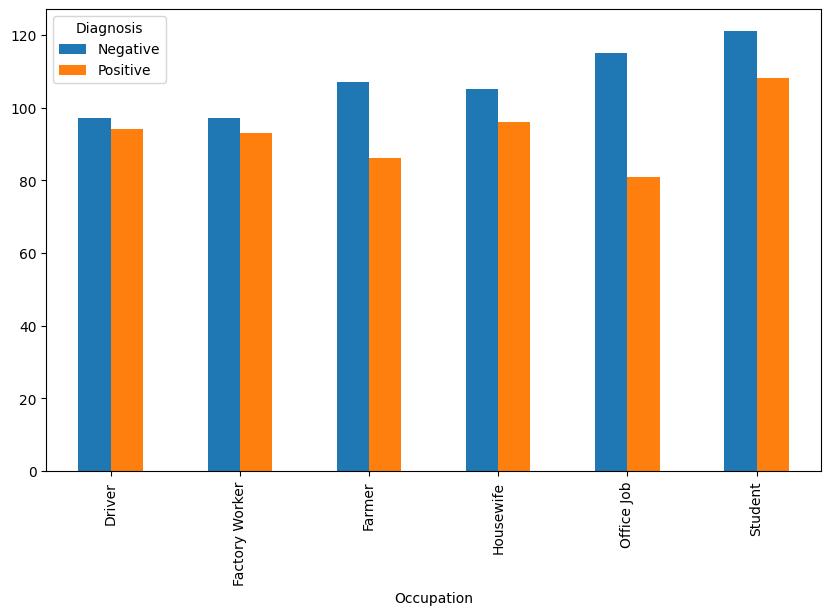

In [34]:
# bar graph of occupation and diagnosis
df.groupby('Occupation')['Diagnosis'].value_counts().unstack().plot(kind='bar', figsize=(10, 6))